In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define HMM Model Parameters

In [9]:
# States and their phonemes
states = ['S1 (/h/)', 'S2 (/e/)', 'S3 (/l/)', 'S4 (/o/)']
state_phonemes = ['/h/', '/e/', '/l/', '/o/']

# Observations (feature vectors)
observations = ['O1', 'O2', 'O3', 'O4']
obs_sequence = [0, 1, 2, 3]  # Corresponds to O1, O2, O3, O4

# Transition Probability Matrix (A)
A = np.array([
    [0.0, 0.7, 0.3, 0.0],  # S1 (/h/)
    [0.0, 0.2, 0.6, 0.2],  # S2 (/e/)
    [0.0, 0.0, 0.3, 0.7],  # S3 (/l/)
    [0.0, 0.0, 0.1, 0.9]   # S4 (/o/)
])

# Emission Probability Matrix (B)
B = np.array([
    [0.6, 0.2, 0.1, 0.1],  # S1 (/h/)
    [0.1, 0.7, 0.1, 0.1],  # S2 (/e/)
    [0.1, 0.1, 0.6, 0.2],  # S3 (/l/)
    [0.2, 0.1, 0.2, 0.5]   # S4 (/o/)
])

# Initial state probabilities (π)
pi = np.array([1.0, 0.0, 0.0, 0.0])

# Display model parameters
print("States:", states)
print("Observations:", observations)
print("\nTransition Probability Matrix (A):")
print(pd.DataFrame(A, index=states, columns=states))
print("\nEmission Probability Matrix (B):")
print(pd.DataFrame(B, index=states, columns=observations))
print("\nInitial probabilities (pi):", pi)
print("\nObservation Sequence:", [observations[i] for i in obs_sequence])


States: ['S1 (/h/)', 'S2 (/e/)', 'S3 (/l/)', 'S4 (/o/)']
Observations: ['O1', 'O2', 'O3', 'O4']

Transition Probability Matrix (A):
          S1 (/h/)  S2 (/e/)  S3 (/l/)  S4 (/o/)
S1 (/h/)       0.0       0.7       0.3       0.0
S2 (/e/)       0.0       0.2       0.6       0.2
S3 (/l/)       0.0       0.0       0.3       0.7
S4 (/o/)       0.0       0.0       0.1       0.9

Emission Probability Matrix (B):
           O1   O2   O3   O4
S1 (/h/)  0.6  0.2  0.1  0.1
S2 (/e/)  0.1  0.7  0.1  0.1
S3 (/l/)  0.1  0.1  0.6  0.2
S4 (/o/)  0.2  0.1  0.2  0.5

Initial probabilities (pi): [1. 0. 0. 0.]

Observation Sequence: ['O1', 'O2', 'O3', 'O4']


## Visualization

### Transition Probability Matrix Heatmap

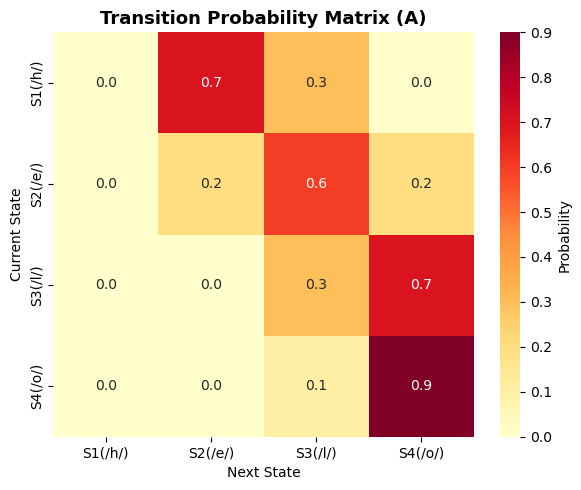

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(A, annot=True, fmt='.1f', cmap='YlOrRd', 
            xticklabels=['S1(/h/)', 'S2(/e/)', 'S3(/l/)', 'S4(/o/)'],
            yticklabels=['S1(/h/)', 'S2(/e/)', 'S3(/l/)', 'S4(/o/)'],
            cbar_kws={'label': 'Probability'})
plt.title('Transition Probability Matrix (A)', fontsize=13, fontweight='bold')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.tight_layout()
plt.show()


### Emission Probability Matrix Heatmap

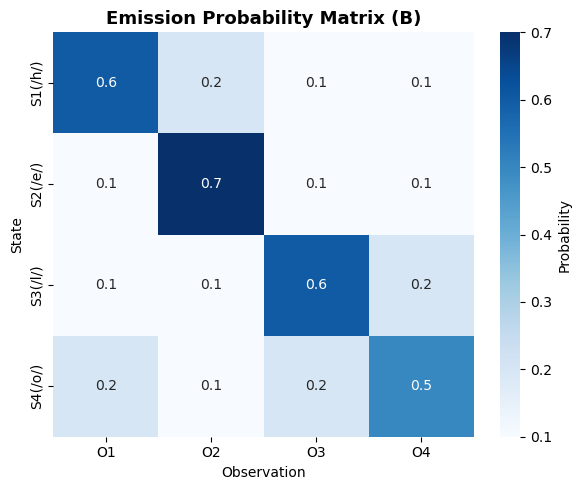

In [25]:
plt.figure(figsize=(6,5))
sns.heatmap(B, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=['O1', 'O2', 'O3', 'O4'],
            yticklabels=['S1(/h/)', 'S2(/e/)', 'S3(/l/)', 'S4(/o/)'],
            cbar_kws={'label': 'Probability'})
plt.title('Emission Probability Matrix (B)', fontsize=13, fontweight='bold')
plt.xlabel('Observation')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Initial State Probabilities

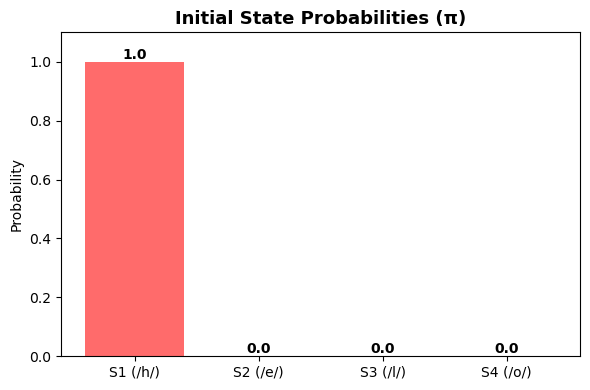

In [26]:
plt.figure(figsize=(6,4))
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#f9ca24']
bars = plt.bar(states, pi, color=colors)
plt.title('Initial State Probabilities (π)', fontsize=13, fontweight='bold')
plt.ylabel('Probability')
plt.ylim([0, 1.1])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


## Viterbi Algorithm Implementation

In [ ]:
def viterbi_algorithm(obs_sequence, states, pi, A, B):
    n_states = len(states)
    T = len(obs_sequence)
    viterbi = np.zeros((n_states, T))
    path = np.zeros((n_states, T), dtype=int)
    for s in range(n_states):
        viterbi[s, 0] = pi[s] * B[s, obs_sequence[0]]
        path[s, 0] = 0
    for t in range(1, T):
        for s in range(n_states):
            prob = [viterbi[prev_s, t-1] * A[prev_s, s] * B[s, obs_sequence[t]]
                    for prev_s in range(n_states)]
            viterbi[s, t] = max(prob)
            path[s, t] = np.argmax(prob)
    best_last_state = np.argmax(viterbi[:, T-1])
    max_probability = viterbi[best_last_state, T-1]
    best_path = [best_last_state]
    for t in range(T-1, 0, -1):
        best_path.insert(0, path[best_path[0], t])
    return best_path, max_probability, viterbi, path

best_path, max_prob, viterbi_table, path_table = viterbi_algorithm(obs_sequence, states, pi, A, B)


In [ ]:
print("="*60)
print("VITERBI ALGORITHM RESULTS")
print("="*60)

print("\n1. Most Likely State Sequence:")
print("   " + " → ".join([states[s] for s in best_path]))

print("\n2. Corresponding Phoneme Sequence:")
print("   " + " → ".join([state_phonemes[s] for s in best_path]))

print(f"\n3. Probability of Most Likely Sequence:")
print(f"   {max_prob:.8f}")

print("\n4. Viterbi Probability Table:")
viterbi_df = pd.DataFrame(
    viterbi_table,
    index=states,
    columns=[f"t={i} ({observations[obs_sequence[i]]})" for i in range(len(obs_sequence))]
)
print(viterbi_df)


VITERBI ALGORITHM RESULTS

1. Most Likely State Sequence:
   S1 (/h/) → S2 (/e/) → S3 (/l/) → S4 (/o/)

2. Corresponding Phoneme Sequence:
   /h/ → /e/ → /l/ → /o/

3. Probability of Most Likely Sequence:
   0.03704400

4. Viterbi Probability Table:
          t=0 (O1)  t=1 (O2)  t=2 (O3)  t=3 (O4)
S1 (/h/)       0.6     0.000   0.00000  0.000000
S2 (/e/)       0.0     0.294   0.00588  0.000118
S3 (/l/)       0.0     0.018   0.10584  0.006350
S4 (/o/)       0.0     0.000   0.01176  0.037044


### Viterbi Probability Evolution

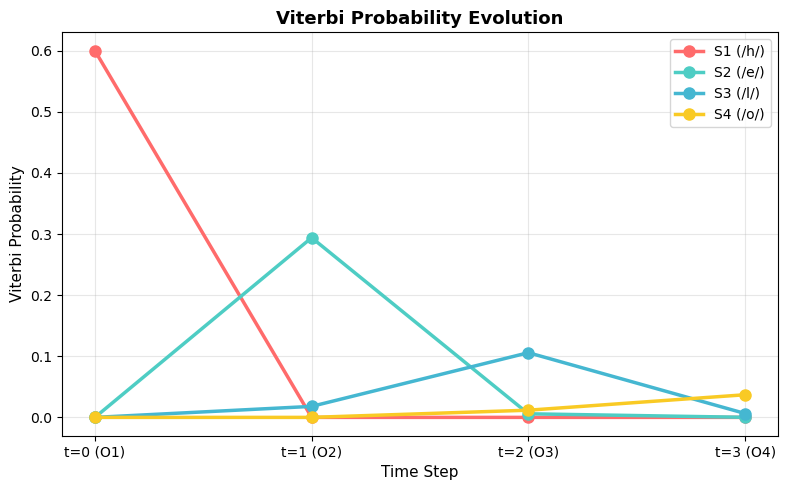

In [ ]:
plt.figure(figsize=(8,5))
for i, state in enumerate(states):
    plt.plot(range(len(obs_sequence)), viterbi_table[i, :], marker='o', linewidth=2.5, label=state, color=colors[i], markersize=8)
plt.xlabel('Time Step', fontsize=11)
plt.ylabel('Viterbi Probability', fontsize=11)
plt.title('Viterbi Probability Evolution', fontsize=13, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(range(len(obs_sequence)), [f"t={t} ({observations[obs_sequence[t]]})" for t in range(len(obs_sequence))])
plt.tight_layout()
plt.show()


### Best Path (Decoded Phoneme Sequence)

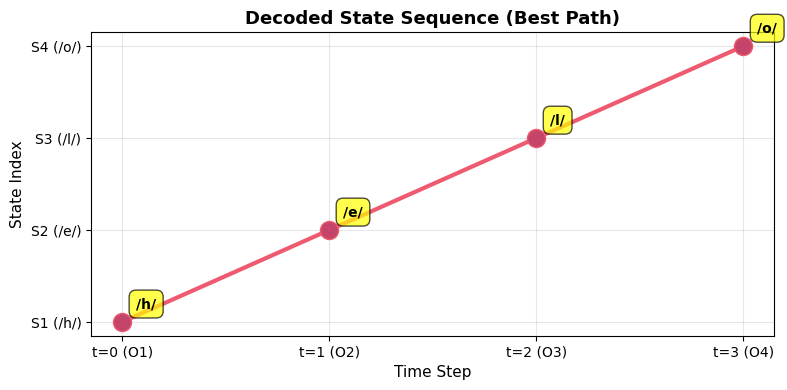

In [27]:
plt.figure(figsize=(8,4))
path_states = [best_path[t] for t in range(len(obs_sequence))]
plt.plot(range(len(obs_sequence)), path_states, marker='o', linewidth=3, markersize=13, color='#ee5a6f', markerfacecolor='#c44569')
plt.xlabel('Time Step', fontsize=11)
plt.ylabel('State Index', fontsize=11)
plt.yticks(range(len(states)), states)
plt.xticks(range(len(obs_sequence)), [f"t={t} ({observations[obs_sequence[t]]})" for t in range(len(obs_sequence))])
plt.title('Decoded State Sequence (Best Path)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
for t in range(len(obs_sequence)):
    plt.annotate(state_phonemes[best_path[t]], 
                 xy=(t, best_path[t]), xytext=(10, 10),
                 textcoords='offset points', fontsize=10, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))
plt.tight_layout()
plt.show()


### Viterbi Table as Heatmap

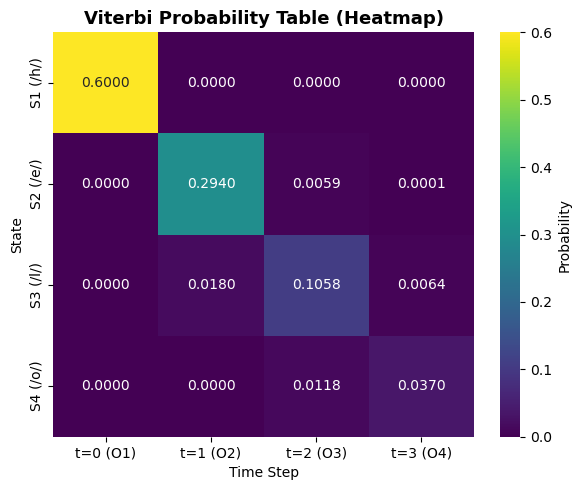

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(viterbi_table, annot=True, fmt='.4f', cmap='viridis',
            xticklabels=[f"t={t} ({observations[obs_sequence[t]]})" for t in range(len(obs_sequence))],
            yticklabels=states, cbar_kws={'label': 'Probability'})
plt.title('Viterbi Probability Table (Heatmap)', fontsize=13, fontweight='bold')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### State Transition Flow (Best Path)

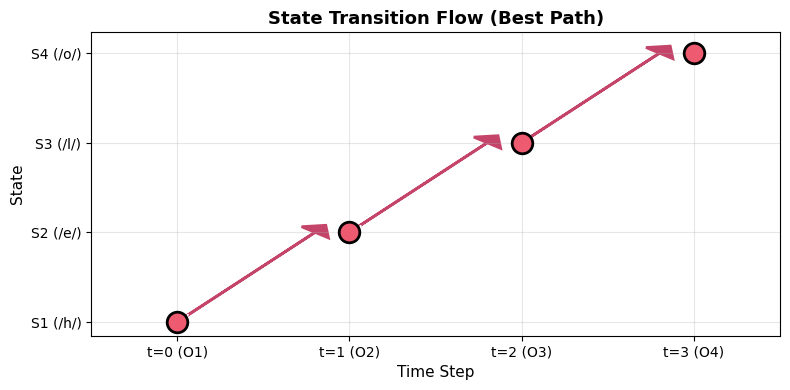

In [28]:
plt.figure(figsize=(8,4))
for t in range(len(obs_sequence)-1):
    plt.arrow(t, best_path[t], 0.8, best_path[t+1]-best_path[t], 
             head_width=0.20, head_length=0.10, fc='#c44569', ec='#c44569', linewidth=2)
plt.scatter(range(len(obs_sequence)), path_states, s=220, c='#ee5a6f', zorder=6, edgecolors='black', linewidth=2)
for t in range(len(obs_sequence)):
    plt.text(t, best_path[t], state_phonemes[best_path[t]], ha='center', va='center', fontsize=12, fontweight='bold', color='white')
plt.xlabel('Time Step', fontsize=11)
plt.ylabel('State', fontsize=11)
plt.title('State Transition Flow (Best Path)', fontsize=13, fontweight='bold')
plt.yticks(range(len(states)), states)
plt.xticks(range(len(obs_sequence)), [f"t={t} ({observations[obs_sequence[t]]})" for t in range(len(obs_sequence))])
plt.xlim(-0.5, len(obs_sequence)-0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Final State Probabilities

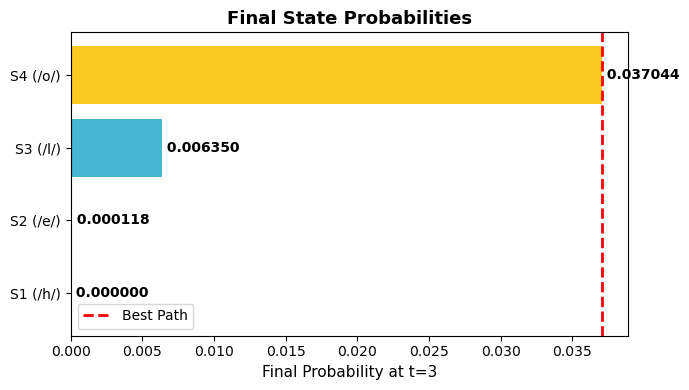

In [29]:
plt.figure(figsize=(7,4))
final_probs = viterbi_table[:, -1]
bars = plt.barh(states, final_probs, color=colors)
plt.xlabel('Final Probability at t=3', fontsize=11)
plt.title('Final State Probabilities', fontsize=13, fontweight='bold')
plt.axvline(x=max_prob, color='red', linestyle='--', linewidth=2, label='Best Path')
for i, (bar, prob) in enumerate(zip(bars, final_probs)):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2., f' {prob:.6f}', ha='left', va='center', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()
